# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.style.use('seaborn-whitegrid')

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


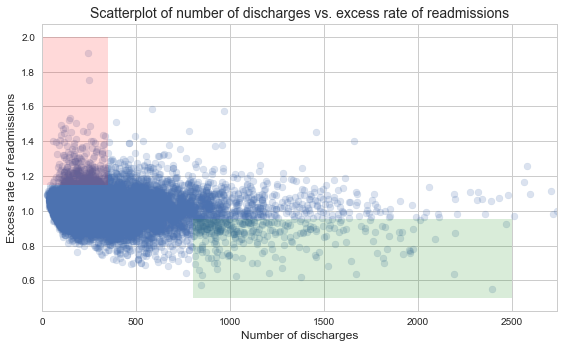

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Analysis of Preliminary Report

Before making any comments on the preliminary report, it helps to analyse the DataFrame ourselves and construct visualisations and inferences from it.

In [6]:
df = clean_hospital_read_df
df.sample(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
13724,SANFORD MEDICAL CENTER FARGO,350011,ND,READM-30-HIP-KNEE-HRRP,1669,NaN,0.6347,3.2,5.1,46.0,07/01/2010,06/30/2013
7749,NASON HOSPITAL,390062,PA,READM-30-HF-HRRP,100,NaN,0.9855,20.8,21.1,20.0,07/01/2010,06/30/2013
4055,MADISON COUNTY HOSPITAL INC,360189,OH,READM-30-COPD-HRRP,50,NaN,1.0404,18.3,17.6,12.0,07/01/2010,06/30/2013
5537,CLEVELAND REGIONAL MEDICAL CENTER,340021,NC,READM-30-AMI-HRRP,89,NaN,1.0165,19.2,18.9,18.0,07/01/2010,06/30/2013
2730,CLEVELAND CLINIC HOSPITAL,100289,FL,READM-30-HF-HRRP,456,NaN,1.0668,24.4,22.8,115.0,07/01/2010,06/30/2013


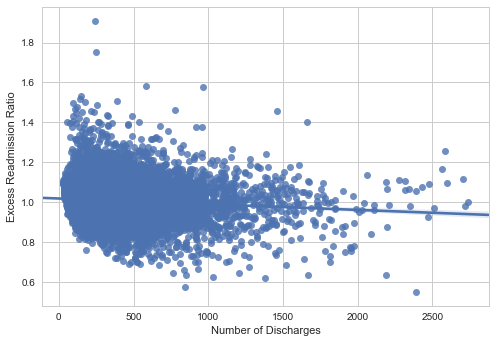

In [7]:
# following the plot, removing outliers

_=sns.regplot(y="Excess Readmission Ratio", x="Number of Discharges", data=df[df['Number of Discharges'] < 3000])

From the scatterplot, we can see that there is a weak negative correlation between the Excess Readmission Ratio and the Number of Discharges. To get a quantitative estimate of the correlation, we calculate the r_value.

In [8]:
df2 = df['Excess Readmission Ratio'].isnull()
df2 = df[~df2]
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['Number of Discharges'], df2['Excess Readmission Ratio'])

r_value
print('The R\N{SUPERSCRIPT TWO} value is {}'.format(r_value))

The R² value is -0.0973979435107935


In [9]:
df2.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.008849,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.008849,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


The $R^2$ value obtained is -0.09739 which implies a __weak negative__ correlation.

****

## Preliminary Report (My take)

Based on the graph above I will assign one of the four values, correct, incorrect, misleading or unfounded. 

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges __Incorrect__ since the line is more flat that sloping
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red) __Correct__ 
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) __Correct__

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 __Correct__
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 __Correct__

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. __Incorrect__ as we can see from correlation data above
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions. __Unfounded__ since we do not have data to examine the reasons for readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation. __Unfounded__ since no relationship has been established between resource allocation and quality of care
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges. __Misleading__ since hospitals with larger discharge rates have not shown clear lead in keeping in readmission rate low.

In [12]:
large_df = df[df['Number of Discharges'] > 1000]
large_mean = large_df['Excess Readmission Ratio'].mean()
large_prop = (sum(large_df['Excess Readmission Ratio'] > 1)/len(large_df)) * 100

large_mean, large_prop

(0.97833542116630667, 44.492440604751621)

In [13]:
small_df = df[df['Number of Discharges'] < 100]
small_mean = small_df['Excess Readmission Ratio'].mean()
small_prop = (sum(small_df['Excess Readmission Ratio'] > 1)/len(small_df)) * 100

small_mean, small_prop

(1.0226183501683501, 59.180457052797472)

### Analysis of the Data Provided

Let's split the original dataset into two parts, large, and small, a reasonable metric to use will be the median of discharges.

In [14]:
df['Number of Discharges'].median()

280.0

Moving forward, for the sake of our analysis we will assume the following:

* **Large Hospitals**: Number of discharges greater than or equal to 300.
* **Small Hospitals**: Number of discharges less than 300.

The mean 0.9998708480237521 and standard deviation for large hopitals/ facilities is 0.10111825848665275


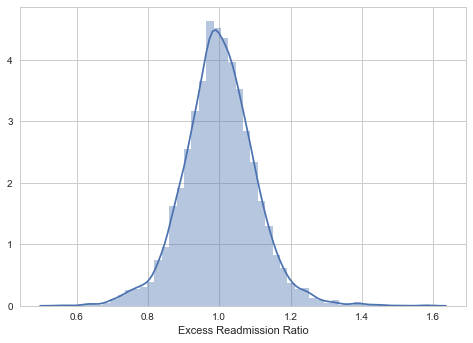

In [15]:
large_df = df[df['Number of Discharges'] >= 300]
large_ratio = large_df['Excess Readmission Ratio']
large_mean = large_ratio.mean()
large_std = large_ratio.std()

sns.distplot(large_ratio)
print('The mean {} and standard deviation for large hopitals/ facilities is {}'.format(large_mean, large_std))

The mean 1.0142382121807467 and standard deviation for small hopitals/ facilities is 0.08247820844558372


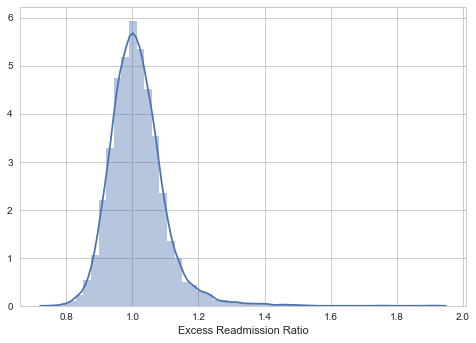

In [16]:
small_df = df[df['Number of Discharges'] < 300]
mask = small_df['Excess Readmission Ratio'].isnull()
small_df = small_df[~mask]

small_ratio = small_df['Excess Readmission Ratio']
small_mean = small_ratio.mean()
small_std = small_ratio.std()

sns.distplot(small_ratio)
print('The mean {} and standard deviation for small hopitals/ facilities is {}'.format(small_mean, small_std))

We have plotted the histograms and calculated the mean and standard deviation of the excess admission ratio for small and large hospitals. We find that there is a difference in the values for small and large hospitals. But is this value statisitcally significant?

This can be answered with a hypothesis test.

## Hypothesis test

We want find out if there is a difference in mean of the excess readmission ratio for small and large hospitals. The statistical significance of the difference in the sampled distrbution can be checked using hypothesis testing.

Assume, significance level $\alpha$ = 0.01

To conduct the hypothesis test, the following are defined:
* **Null Hypothesis:** The true mean excess readmission ratio for small and large hospitals are equal
* **Alternate Hypothesis:** The true mean excess readmission ratio for small and large hospitals are unequal

We assume the null hypothesis to be true to conduct this analysis.

In [18]:
h0_mean_diff = 0
mean_diff = large_mean - small_mean
sigma_diff = np.sqrt((large_std**2)/len(large_ratio)  + (small_std**2)/len(small_ratio))

print('The difference in means is {} and difference in sigma is {}'.format(mean_diff, sigma_diff))

The difference in means is -0.014367364156994578 and difference in sigma is 0.0017352504446900528


In [20]:
z = (mean_diff - h0_mean_diff) / sigma_diff
p = stats.norm.cdf(z) * 2
print('The value of z is {} and p is {}'.format(z, p))

The value of z is -8.279706368011247 and p is 1.2347937250625545e-16


The value of p obtained is almost 0, thus the null hypothesis can be rejected.

## Statistical Significance and Practical Significance

The result obtained is statistically significant as we rejected the null hypothesis for statistical significance level $\alpha$=0.01

Although there is a statistically significant difference between the means of the two sizes of hospital, we cannot conclude that the same is practically significant too. Let us check the range under which 99.7% (or 3 standard deviations) of the samples fall under.

In [21]:
large_range = large_mean - 3*large_std, large_mean + 3*large_std
small_range = small_mean - 3*small_std, small_mean + 3*small_std

print('Range for large hospitals: {}'.format(large_range))
print('Range for small hospitals: {}'.format(small_range))

Range for large hospitals: (0.69651607256379389, 1.3032256234837103)
Range for small hospitals: (0.76680358684399552, 1.2616728375174979)


As can be seen above, the ranges within which 99.7% of the samples fall are pretty close to each other, practically speaking.

Therefore, although the result is statistically significant, it is not practically significant to warrant policies based on it. My suggestion to the client would be to look for other features that are more strongly correlated to the excess admission ratio and formulate policies based on modifying the strongly correlated feature.

## Scatterplot

An important advantage of using a scatterplot is that is allows us to visualize the correlation between two variables. In the scatterplot constructed above, it can be clearly seen that there is a very weak (almost non-existent) negative correlation between hospital capacity and excess admission ratio.

However, scatterplots have their disadvantages. In this case, there was a large amount of overplotting which led to the preliminary reported coming up with incorrect and misleading conclusions.

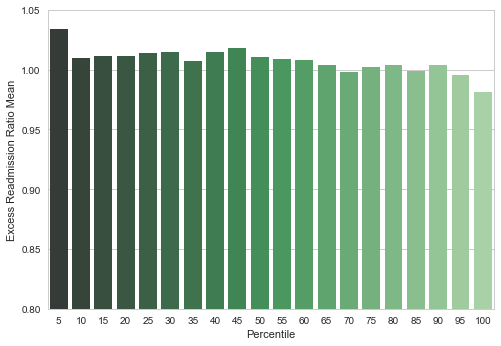

In [26]:
df['Size'] = df['Number of Discharges'].apply(lambda x: 1 if x >= 300 else 0)

mask = df['Excess Readmission Ratio'].isnull()
df3 = df[~mask]

df3 = df3.sort_values('Number of Discharges')
size = len(df3)
percentile_jump = round(size/20)

group_means = []

for i in range(0, size, percentile_jump):
    frame = df3.iloc[i:i+percentile_jump]
    group_means.append(frame['Excess Readmission Ratio'].mean())

percentiles = [5*i for i in range(1, len(group_means) + 1)]

sns.barplot(percentiles, group_means, palette="Greens_d")
plt.xlabel('Percentile')
plt.ylabel('Excess Readmission Ratio Mean')
_=plt.ylim((0.8,1.05))


As the graph above demonstrates, there is no discernible trend of decreasing readmission ratio with increasing hospital size.

In [27]:
total_big = sum((df['Number of Discharges'] >= 300))
total_small = sum((df['Number of Discharges'] < 300))

d = {
    'Agg. Ratio': ['>1', '<=1'], 
    'Big': [sum((df['Number of Discharges'] >= 300) & (df['Excess Readmission Ratio'] > 1)), sum((df['Number of Discharges'] >= 300) & (df['Excess Readmission Ratio'] <= 1))], 
    'Small': [sum((df['Number of Discharges'] < 300) & (df['Excess Readmission Ratio'] > 1)), sum((df['Number of Discharges'] < 300) & (df['Excess Readmission Ratio'] <= 1))]
}

df4 = pd.DataFrame(data=d)
df4['Big'] = df4['Big'] / total_big
df4['Small'] = df4['Small'] / total_small
df4

,Agg. Ratio,Big,Small
0,>1,0.492856,0.530457
1,<=1,0.507144,0.456455


In [28]:
df4 = pd.melt(df4, id_vars="Agg. Ratio", var_name="size", value_name="number")
df4

,Agg. Ratio,size,number
0,>1,Big,0.492856
1,<=1,Big,0.507144
2,>1,Small,0.530457
3,<=1,Small,0.456455


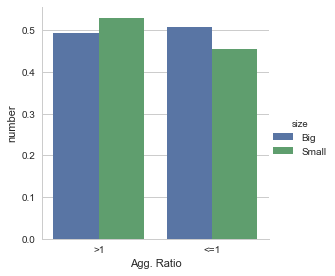

In [29]:
_=sns.factorplot(x='Agg. Ratio', y='number', hue='size', data=df4, kind='bar')

As is clear from plotting hospitals of different size but similar readmission ratio, that there is no noticeable difference between them.